In [1]:
import numpy as np

In [231]:
# Use a template from the beebs matmult.c file to allow writing tests for variable size 
# matrices

SIZE = 50
INT = False
MULTIPLY_TYPE = 'temporal' # ['default', 'spatial', 'temporal']
UNROLL = MULTIPLY_TYPE == 'temporal'

np.random.seed(1)
A = np.around(np.random.rand(SIZE, SIZE), decimals=6)
B = np.around(np.random.rand(SIZE, SIZE), decimals=6)
C = np.around(np.dot(A, B), decimals=6)

with open('template.c', 'r') as f:
    d = f.read()

int_matrix = matrix[0].format(roll_unroll=unroll if UNROLL else roll)
float_matrix = matrix[1].format(roll_unroll=unroll if UNROLL else roll)

options = {'upper_limit': SIZE,
          'float_matrix': float_matrix, 'int_matrix':int_matrix,
          'Multiply':multiply[MULTIPLY_TYPE],
          'initialise_benchmark':init_benchmark[MULTIPLY_TYPE],
          'array_a': 'matrix ArrayA = ' + print_array(A, unroll=UNROLL) + ';',
          'array_b': 'matrix ArrayB = ' + print_array(B, unroll=UNROLL) + ';',
          'exp_float': print_array(C, unroll=UNROLL),
          'exp_int': print_array(C, unroll=UNROLL), # TODO
          'verification': verification['unroll' if UNROLL else 'roll']}

with open('matmult.c', 'w') as f:
    f.write(d.format(**options))

In [232]:
x = [50, 100, 200, 400]
block_B5_icache_r = [132, 127, 125, 125]
block_B5_icache_m = [1546, 1469, 1563, 1483]
block_B5_dcache_r = [3904, 120968, 1059928, 22756192]
block_B5_dcache_m = [22459, 519428, 8106460, 109719983]
block_B5_t = [0.285,  2.300, 18.636, 154.016]
        
block_B10_icache_r = [138, 133, 131, 131]
block_B10_icache_m = [1542, 1486, 1689, 1492]
block_B10_dcache_r = [3904, 77348, 686588, 11020812]
block_B10_dcache_m = [22325, 395467, 4928608, 60310500]
block_B10_t = [0.254,  2.037, 16.353, 132.794]

block_B20_icache_r = [139, 131, 131, 131]
block_B20_icache_m = [1649, 1615, 1540, 1490]
block_B20_dcache_r = [4192, 59780, 595036, 4533804]
block_B20_dcache_m = [23765, 355987, 3626438, 37756214]
block_B20_t = [0.406,  1.919, 15.341, 123.035]

spatial_icache_r = [133, 131, 131, 131]
spatial_icache_m = [1482, 1470, 1545, 1489]
spatial_dcache_r = [3752, 588648, 4378456, 33460360]
spatial_dcache_m = [21217, 1897123, 37051235, 282242718]
spatial_t = [0.232, 2.023, 17.731, 139.881]

default_icache_r = [139, 125, 125, 131]
default_icache_m = [1473, 1391, 1422, 1399]
default_dcache_r = [3872, 352768, 4097680, 36223044]
default_dcache_m = [22024, 1185576, 33843995, 279427509]
default_t = [0.231 , 1.932, 17.418, 139.897]

In [235]:
import matplotlib.pyplot as plt

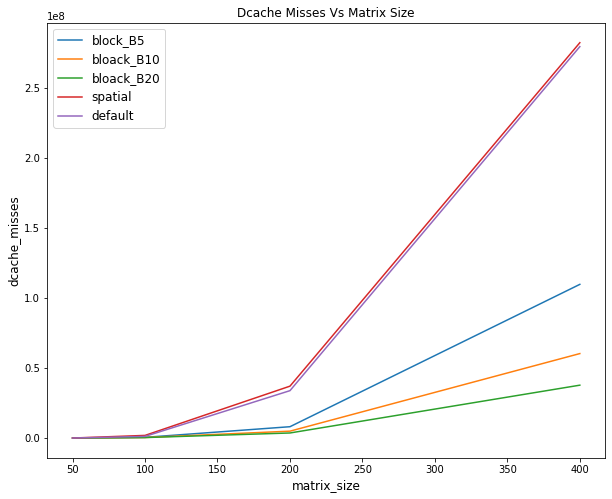

In [248]:
# dcache miss
plt.figure(figsize=(10,8))
plt.plot(x, block_B5_dcache_m, label='block_B5')
plt.plot(x, block_B10_dcache_m, label='bloack_B10')
plt.plot(x, block_B20_dcache_m, label='bloack_B20')
plt.plot(x, spatial_dcache_m, label='spatial')
plt.plot(x, default_dcache_m, label='default')
plt.legend(loc='best', fontsize=12)
plt.xlabel('matrix_size', size=12)
plt.ylabel('dcache_misses', size=12)
plt.title('Dcache Misses Vs Matrix Size')
plt.show()

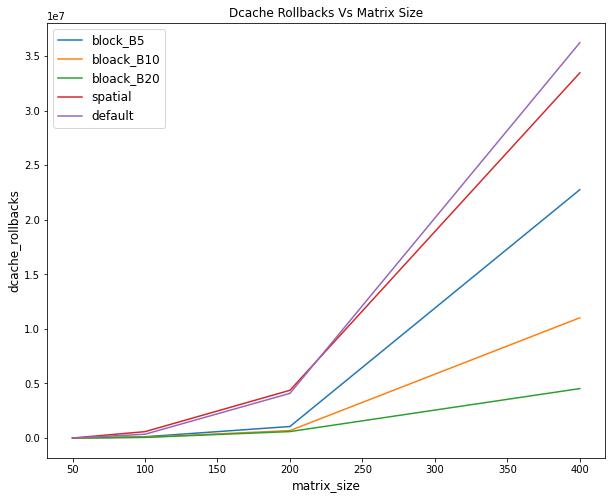

In [250]:
# dcache rollback
plt.figure(figsize=(10,8))
plt.plot(x, block_B5_dcache_r, label='block_B5')
plt.plot(x, block_B10_dcache_r, label='bloack_B10')
plt.plot(x, block_B20_dcache_r, label='bloack_B20')
plt.plot(x, spatial_dcache_r, label='spatial')
plt.plot(x, default_dcache_r, label='default')
plt.legend(loc='best', fontsize=12)
plt.xlabel('matrix_size', size=12)
plt.ylabel('dcache_rollbacks', size=12)
plt.title('Dcache Rollbacks Vs Matrix Size')
plt.show()

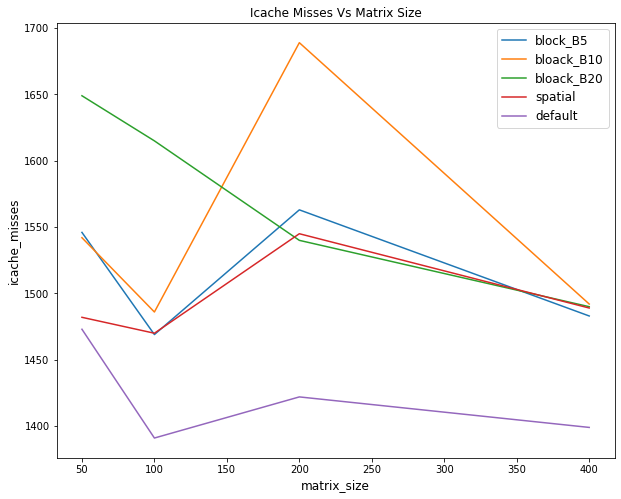

In [249]:
# icache miss
plt.figure(figsize=(10,8))
plt.plot(x, block_B5_icache_m, label='block_B5')
plt.plot(x, block_B10_icache_m, label='bloack_B10')
plt.plot(x, block_B20_icache_m, label='bloack_B20')
plt.plot(x, spatial_icache_m, label='spatial')
plt.plot(x, default_icache_m, label='default')
plt.legend(loc='best', fontsize=12)
plt.xlabel('matrix_size', size=12)
plt.ylabel('icache_misses', size=12)
plt.title('Icache Misses Vs Matrix Size')
plt.show()

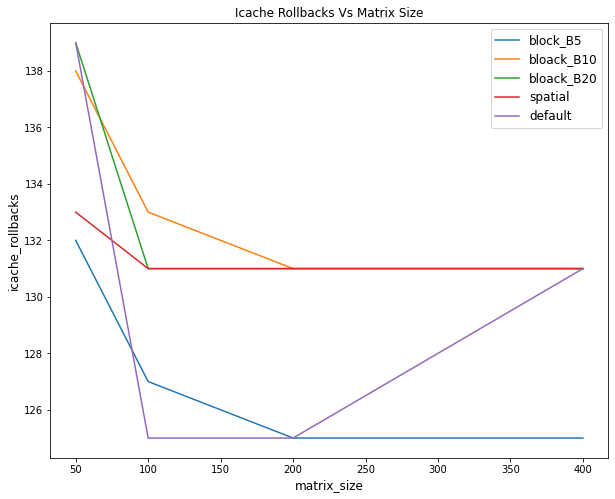

In [251]:
# icache rollback
plt.figure(figsize=(10,8))
plt.plot(x, block_B5_icache_r, label='block_B5')
plt.plot(x, block_B10_icache_r, label='bloack_B10')
plt.plot(x, block_B20_icache_r, label='bloack_B20')
plt.plot(x, spatial_icache_r, label='spatial')
plt.plot(x, default_icache_r, label='default')
plt.legend(loc='best', fontsize=12)
plt.xlabel('matrix_size', size=12)
plt.ylabel('icache_rollbacks', size=12)
plt.title('Icache Rollbacks Vs Matrix Size')
plt.show()

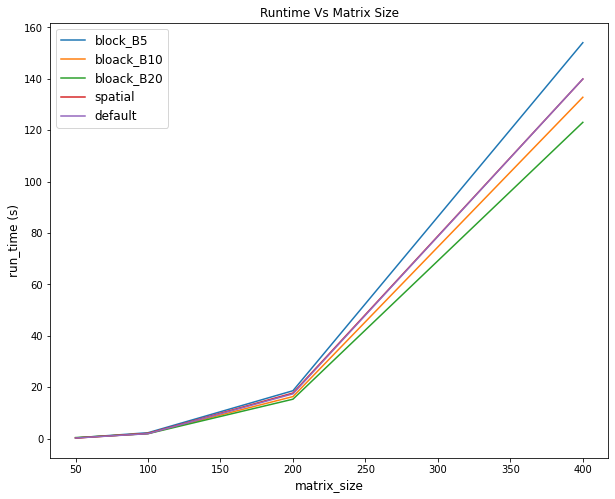

In [252]:
# time
plt.figure(figsize=(10,8))
plt.plot(x, block_B5_t, label='block_B5')
plt.plot(x, block_B10_t, label='bloack_B10')
plt.plot(x, block_B20_t, label='bloack_B20')
plt.plot(x, spatial_t, label='spatial')
plt.plot(x, default_t, label='default')
plt.legend(loc='best', fontsize=12)
plt.xlabel('matrix_size', size=12)
plt.ylabel('run_time (s)', size=12)
plt.title('Runtime Vs Matrix Size')
plt.show()

In [189]:
init_benchmark = {
'temporal':
"""
// temporal
void initialise_benchmark() {
   InitSeed();
   int OuterIndex, InnerIndex;

   for (OuterIndex = 0; OuterIndex < UPPERLIMIT*UPPERLIMIT; OuterIndex++)
         ResultArray[OuterIndex] = ZERO;
}
""",
'spatial':
"""
// spatial
void initialise_benchmark() {
   int OuterIndex, InnerIndex;

   for (OuterIndex = 0; OuterIndex < UPPERLIMIT; OuterIndex++) {
      for (InnerIndex = 0; InnerIndex < UPPERLIMIT; InnerIndex++) {
         ResultArray[OuterIndex][InnerIndex] = ZERO;
      }
   }
}
""",
'default':
"""
// default
void initialise_benchmark() {
   InitSeed();
}
"""}

In [219]:
multiply = {
'temporal':
"""
// temporal
void Multiply(matrix A, matrix B, matrix Res)
{
   register int Outer, Inner, Index, i1, j1, k1;
   int Block = 5;

  for (Outer = 0; Outer < UPPERLIMIT; Outer+=Block) {
    for (Inner = 0; Inner < UPPERLIMIT; Inner+=Block) {
        for (Index = 0; Index < UPPERLIMIT; Index+=Block) {
          // BxB mini matrix multiplications
            for (i1 = Outer; i1 < Outer+Block; i1++)
              for (j1 = Inner; j1 < Inner+Block; j1++)
                for (k1 = Index; k1 < Index+Block; k1++)
                  Res[i1*UPPERLIMIT + j1] += A[i1*UPPERLIMIT  + k1] * B[k1*UPPERLIMIT + j1];
        }
    }
  }
}
""",
'spatial':
"""
// spatial {number_type: int, float}
void Multiply(matrix A, matrix B, matrix Res)
{
   register int Outer, Inner, Index;

  for (Index = 0; Index < UPPERLIMIT; Index++) {
    for (Outer = 0; Outer < UPPERLIMIT; Outer++) {
        register float r = A[Outer][Index];
        for (Inner = 0; Inner < UPPERLIMIT; Inner++){
              Res[Outer][Inner] += r * B[Index][Inner];
        }
    }
  }
}  
""",
'default':
"""
// default
void Multiply(matrix A, matrix B, matrix Res)
{  
   register int Outer, Inner, Index;
   
   for (Outer = 0; Outer < UPPERLIMIT; Outer++)
      for (Inner = 0; Inner < UPPERLIMIT; Inner++)
      {  
         Res [Outer][Inner] = ZERO;
         for (Index = 0; Index < UPPERLIMIT; Index++)
            Res[Outer][Inner] += A[Outer][Index] * B[Index][Inner];
      }
}
"""}

In [185]:
matrix = [
"""
typedef long matrix {roll_unroll};
""",
"""
typedef float matrix {roll_unroll};
"""]

roll = "[UPPERLIMIT][UPPERLIMIT]"
unroll = "[UPPERLIMIT*UPPERLIMIT]"

In [191]:
verification = {
'roll':
"""
  for (i=0; i<UPPERLIMIT; i++)
    for (j=0; j<UPPERLIMIT; j++)
      if (fabs(ResultArray[i][j] - exp[i][j]) > 10E-4) // ResultArray[i][j] != exp[i][j])
        return 0;
  return 1;
""",
'unroll':
"""
  for (i=0; i<UPPERLIMIT*UPPERLIMIT; i++)
      if (fabs(ResultArray[i] - exp[i]) > 10E-4)
        return 0;
  return 1;
"""}